Here I will compare the performance between the three different options for subject tokens : i) Full Name ii) Person PII iii) Full Name + Person PII

In [1]:
import json

In [27]:
import pandas as pd
import json
import os

# Define subject keys and initialize data containers
#subject_keys = ["subject","subjectembedding","subject_pii", "subject_person_pii"]

eval_data, raw_stats_data, summary_stats_data = [], [], []

# Process each subject key
for run in range(1, 11):
    for text in ['True', 'False']:
        config = 'PerMUtok' if text =='True' else 'PerMU'
        P = 1.2 if text == 'False' else 1
        template_path = f'/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/llama3.1-8b/forget10/_AllExperiments/PIIAnalysis/llama3.1-8b_E8_B16_C0.1_P_{P}_intext{text}_run{run}'

        # Read eval.csv
        eval_path = f'{template_path}/eval_results/eval.csv'
        print(eval_path)
        if os.path.exists(eval_path):
            eval_df = pd.read_csv(eval_path)
            eval_df['config'] = config
            eval_data.append(eval_df)
        
        # Read raw stats JSON
        raw_path = f'{template_path}/permu_experiment_raw_data.json'
        if os.path.exists(raw_path):
            with open(raw_path, 'r') as f:
                raw_data = json.load(f)
            raw_df = pd.json_normalize(raw_data) if isinstance(raw_data, dict) else pd.DataFrame(raw_data if isinstance(raw_data, list) else [raw_data])
            raw_df['config'] = config
            raw_stats_data.append(raw_df)
        
        # Read summary stats JSON
        summary_path = f'{template_path}/permu_experiment_summary.json'
        if os.path.exists(summary_path):
            with open(summary_path, 'r') as f:
                summary_data = json.load(f)
            summary_df = pd.json_normalize(summary_data) if isinstance(summary_data, dict) else pd.DataFrame(summary_data if isinstance(summary_data, list) else [summary_data])
            summary_df['config'] = config
            summary_stats_data.append(summary_df)

# Create final dataframes
eval_df_final = pd.concat(eval_data, ignore_index=True) if eval_data else pd.DataFrame()
#eval_df_final.loc[eval_df_final['config'] == 'subject', 'config'] = 'subject_person'
raw_stats_df_final = pd.concat(raw_stats_data, ignore_index=True) if raw_stats_data else pd.DataFrame()
summary_stats_df_final = pd.concat(summary_stats_data, ignore_index=True) if summary_stats_data else pd.DataFrame()

print(f"Created dataframes - Eval: {eval_df_final.shape}, Raw: {raw_stats_df_final.shape}, Summary: {summary_stats_df_final.shape}")

/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/llama3.1-8b/forget10/_AllExperiments/PIIAnalysis/llama3.1-8b_E8_B16_C0.1_P_1_intextTrue_run1/eval_results/eval.csv
/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/llama3.1-8b/forget10/_AllExperiments/PIIAnalysis/llama3.1-8b_E8_B16_C0.1_P_1.2_intextFalse_run1/eval_results/eval.csv
/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/llama3.1-8b/forget10/_AllExperiments/PIIAnalysis/llama3.1-8b_E8_B16_C0.1_P_1_intextTrue_run2/eval_results/eval.csv
/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/llama3.1-8b/forget10/_AllExperiments/PIIAnalysis/llama3.1-8b_E8_B16_C0.1_P_1.2_intextFalse_run2/eval_results/eval.csv
/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/llama3.1-8b/forget10/_AllExperiments/PIIAnalysis/llama3.1-8b_E8_B16_C0.1_P_1_intextTrue_run3/eval_results/eval.csv
/projects/0/hpmlprjs/LLM/danp/UGBench/experiment/PII/llama3.1-8b/forget10/_AllExperiments/PIIAnalysis/llama3.1-8b_E8_B16_C0.1_P_1.2_intextFalse_run3/eval_

In [13]:
raw_stats_df_final

,forget_loss,retain_loss,experiment_info.experiment_name,experiment_info.timestamp,experiment_info.total_batches,entropy.clean,entropy.corrupt,entropy.difference,entropy.contrasted,entropy.student,magnitude.clean,magnitude.corrupt,magnitude.difference,magnitude.contrasted,magnitude.student,kl_divergence.corrupt_vs_clean,config
0,"[2.2683403491973877, 2.239035129547119, 2.3406...","[0.023289212957024574, 0.021598564460873604, 0...",permu_experiment,20250704_192442,93,"[0.03376183658838272, 0.018760019913315773, 0....","[0.5609268546104431, 0.536034882068634, 0.6962...","[0.7005997896194458, 0.6491735577583313, 0.848...","[0.35873347520828247, 0.2925140857696533, 0.36...","[0.03376183658838272, 0.018760019913315773, 0....","[33.386199951171875, 33.76210403442383, 33.415...","[26.271169662475586, 26.582305908203125, 25.77...","[23.614849090576172, 23.90005111694336, 23.246...","[26.58892250061035, 27.189916610717773, 27.288...","[33.386199951171875, 33.76210403442383, 33.415...","[4.8329691886901855, 4.6629319190979, 5.478687...",PerMUtok
1,"[4.189978122711182, 4.868688583374023, 5.59828...","[0.023289212957024574, 0.021598564460873604, 0...",permu_experiment,20250704_230318,93,"[0.03376183658838272, 0.018760019913315773, 0....","[2.1183197498321533, 2.181779384613037, 2.6818...","[2.3933913707733154, 2.4699246883392334, 3.065...","[0.9772108197212219, 1.0166826248168945, 1.289...","[0.03376183658838272, 0.018760019913315773, 0....","[33.386199951171875, 33.76210403442383, 33.415...","[21.916778564453125, 21.845951080322266, 19.93...","[19.491731643676758, 19.47675132751465, 17.785...","[23.706125259399414, 24.042560577392578, 23.23...","[33.386199951171875, 33.76210403442383, 33.415...","[4.987237453460693, 5.407208442687988, 6.30984...",PerMU


#### Plot the Raw Data

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_training_metrics(df, metric_column, figsize=(12, 8)):
    """
    Plot training metrics across batches for different configs
    
    Args:
        df: DataFrame with configs and metric columns containing arrays of 100 values
        metric_column: Column name to plot (e.g., 'entropy.clean')
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    
    # Colors for different configs
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    for idx, (_, row) in enumerate(df.iterrows()):
        config_name = row['config']
        metric_values = row[metric_column]
        
        # Handle different data types
        if isinstance(metric_values, str):
            # If stored as string, try to convert
            try:
                metric_values = eval(metric_values)  # or use ast.literal_eval for safety
            except:
                print(f"Could not parse values for {config_name}")
                continue
        
        # Create x-axis (batch numbers 0-99)
        x_values = list(range(len(metric_values)))
        
        # Plot the line
        plt.plot(x_values, metric_values, 
                label=f'{config_name}', 
                color=colors[idx % len(colors)], 
                linewidth=2, 
                alpha=0.8)
    
    plt.xlabel('Batch Number', fontsize=12)
    plt.ylabel(metric_column, fontsize=12)
    plt.title(f'{metric_column} Across Training Batches', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt


In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_training_metrics_academic(df, metric_columns, figsize=(15, 10)):
    """
    Plot training metrics across batches for different configs in academic style
    
    Args:
        df: DataFrame with configs and metric columns containing arrays of 100 values
        metric_columns: List of column names to plot (e.g., ['forget_loss', 'entropy.corrupt'])
        figsize: Figure size tuple
    """
    # Set up the figure with subplots
    fig, axes = plt.subplots(2, 1, figsize=figsize, sharex=True)
    
    # Academic color palette - neutral and professional
    colors = ['#2C3E50', '#8E44AD', '#16A085', '#E67E22', '#34495E']
    
    # Enhanced font settings for academic appearance
    plt.rcParams.update({
        'font.size': 12,
        'font.family': 'serif',
        'axes.linewidth': 1.2,
        'grid.linewidth': 0.8,
        'lines.linewidth': 2.5
    })
    
        # Define proper academic titles and labels - FIXED TO MATCH YOUR COLUMN NAMES
    titles = {
        'forget_loss_mean': 'Forget Loss During Training',
        'entropy.corrupt_mean': 'Entropy of Corrupted Logits During Training',
        'forget_loss': 'Forget Loss During Training',
        'entropy.corrupt': 'Entropy of Corrupted Logits During Training',
    }
    
    ylabels = {
        'forget_loss_mean': 'Forget Loss',
        'entropy.corrupt_mean': 'Entropy Corruption',
        'forget_loss': 'Forget Loss', 
        'entropy.corrupt': 'Entropy Corruption'
    }
    
    print("Columns in df_aggregated:", df.columns.tolist())
    print("First row of df_aggregated:")
    print(df.iloc[0])
    
    for plot_idx, metric_column in enumerate(metric_columns):
        ax = axes[plot_idx]
        
        for idx, (_, row) in enumerate(df.iterrows()):
            config_name = row['config']
            metric_values = row[metric_column]
            
            # Handle different data types
            if isinstance(metric_values, str):
                try:
                    metric_values = eval(metric_values)  # or use ast.literal_eval for safety
                except:
                    print(f"Could not parse values for {config_name}")
                    continue
            
            # Create x-axis (batch numbers 0-99)
            x_values = list(range(len(metric_values)))
            
            # Plot the line with enhanced styling
            ax.plot(x_values, metric_values,
                   label=f'{config_name}',
                   color=colors[idx % len(colors)],
                   linewidth=2.5,
                   alpha=0.9)
        
        # Enhanced styling for academic appearance
        ax.set_ylabel(ylabels.get(metric_column, metric_column), 
                     fontsize=14, fontweight='bold')
        ax.set_title(titles.get(metric_column, f'{metric_column} Across Training Batches'), 
                    fontsize=16, fontweight='bold', pad=20)
        
        # Enhanced grid and legend
        ax.grid(True, alpha=0.4, linestyle='-', linewidth=0.8)
        ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True, 
                 loc='best', framealpha=0.9)
        
        # Improve tick labels
        ax.tick_params(axis='both', which='major', labelsize=11, width=1.2)
        
        # Add subtle background color
        ax.set_facecolor('#fafafa')
        
        # Enhance spines
        for spine in ax.spines.values():
            spine.set_linewidth(1.2)
            spine.set_color('#333333')
    
    # Set common x-label only on bottom plot
    axes[-1].set_xlabel('Training Batch Number', fontsize=14, fontweight='bold')
    
    # Add overall title
   #fig.suptitle('Training Dynamics: Loss and Entropy Metrics Comparison', 
   #             fontsize=18, fontweight='bold', y=0.98)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.3)
    
    return fig

# Alternative single-plot version for individual metrics
def plot_single_metric_academic(df, metric_column, figsize=(12, 8)):
    """
    Plot a single training metric with academic styling
    """
    plt.figure(figsize=figsize)
    
    # Academic styling
    plt.rcParams.update({
        'font.size': 12,
        'font.family': 'serif',
        'axes.linewidth': 1.2,
        'grid.linewidth': 0.8,
        'lines.linewidth': 2.5
    })
    
    colors = ['#2C3E50', '#8E44AD', '#16A085', '#E67E22', '#34495E']
    
    for idx, (_, row) in enumerate(df.iterrows()):
        config_name = row['config']
        metric_values = row[metric_column]
        
        if isinstance(metric_values, str):
            try:
                metric_values = eval(metric_values)
            except:
                print(f"Could not parse values for {config_name}")
                continue
        
        x_values = list(range(len(metric_values)))
        
        plt.plot(x_values, metric_values,
                label=f'{config_name}',
                color=colors[idx % len(colors)],
                linewidth=2.5,
                alpha=0.9)
    
    plt.xlabel('Training Batch Number', fontsize=14, fontweight='bold')
    plt.ylabel(metric_column.replace('_', ' ').replace('.', ' ').title(), 
              fontsize=14, fontweight='bold')
    plt.title(f'{metric_column.replace("_", " ").replace(".", " ").title()} During Training', 
              fontsize=16, fontweight='bold', pad=20)
    
    plt.legend(fontsize=12, frameon=True, fancybox=True, shadow=True, 
              loc='best', framealpha=0.9)
    plt.grid(True, alpha=0.4, linestyle='-', linewidth=0.8)
    
    # Enhanced styling
    ax = plt.gca()
    ax.set_facecolor('#fafafa')
    ax.tick_params(axis='both', which='major', labelsize=11, width=1.2)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#333333')
    
    plt.tight_layout()
    return plt

# Usage examples:
"""
# For multi-plot (recommended for your case)
fig = plot_training_metrics_academic(df, ['forget_loss', 'entropy.corrupt'])
plt.show()

# For single plots
plot_single_metric_academic(df, 'forget_loss')
plt.show()

plot_single_metric_academic(df, 'entropy.corrupt')
plt.show()
"""

"\n# For multi-plot (recommended for your case)\nfig = plot_training_metrics_academic(df, ['forget_loss', 'entropy.corrupt'])\nplt.show()\n\n# For single plots\nplot_single_metric_academic(df, 'forget_loss')\nplt.show()\n\nplot_single_metric_academic(df, 'entropy.corrupt')\nplt.show()\n"

In [74]:
import ast

def aggregate_runs_by_config(df, config_col='config', metric_columns=['forget_loss', 'entropy.corrupt']):
    """
    Aggregate multiple runs per config by computing mean and std across runs
    
    Args:
        df: DataFrame with configs, runs, and metric columns containing lists
        config_col: Column name for config identifier
        metric_columns: List of column names containing metric arrays
    
    Returns:
        DataFrame with aggregated results (mean and std) per config
    """
    aggregated_results = []
    
    # Group by config
    for config_name, config_group in df.groupby(config_col):
        agg_row = {'config': config_name}
        
        for metric_col in metric_columns:
            # Parse string lists to actual lists if needed
            parsed_values = []
            for _, row in config_group.iterrows():
                metric_values = row[metric_col]
                if isinstance(metric_values, str):
                    try:
                        metric_values = ast.literal_eval(metric_values)
                    except:
                        print(f"Could not parse values for {config_name}, {metric_col}")
                        continue
                parsed_values.append(metric_values)
            
            # Convert to numpy array for easier manipulation
            # Shape: (n_runs, n_batches)
            parsed_array = np.array(parsed_values)
            
            # Compute statistics across runs (axis=0)
            mean_values = np.mean(parsed_array, axis=0)
            std_values = np.std(parsed_array, axis=0)
            
            # Store aggregated results
            agg_row[f'{metric_col}_mean'] = mean_values.tolist()
            agg_row[f'{metric_col}_std'] = std_values.tolist()
        
        aggregated_results.append(agg_row)
    
    return pd.DataFrame(aggregated_results)

In [75]:
df_aggregated = aggregate_runs_by_config(raw_stats_df_final, 
                                       config_col='config', 
                                       metric_columns=['forget_loss', 'entropy.corrupt'])

Columns in df_aggregated: ['config', 'forget_loss_mean', 'forget_loss_std', 'entropy.corrupt_mean', 'entropy.corrupt_std']
First row of df_aggregated:
config                                                              PerMU
forget_loss_mean        [4.474547362327575, 4.765622901916504, 5.19486...
forget_loss_std         [0.46948305722571754, 0.4962059829527567, 0.48...
entropy.corrupt_mean    [2.051731252670288, 2.0807916045188906, 2.5013...
entropy.corrupt_std     [0.06134866958339171, 0.08075884448246631, 0.0...
Name: 0, dtype: object


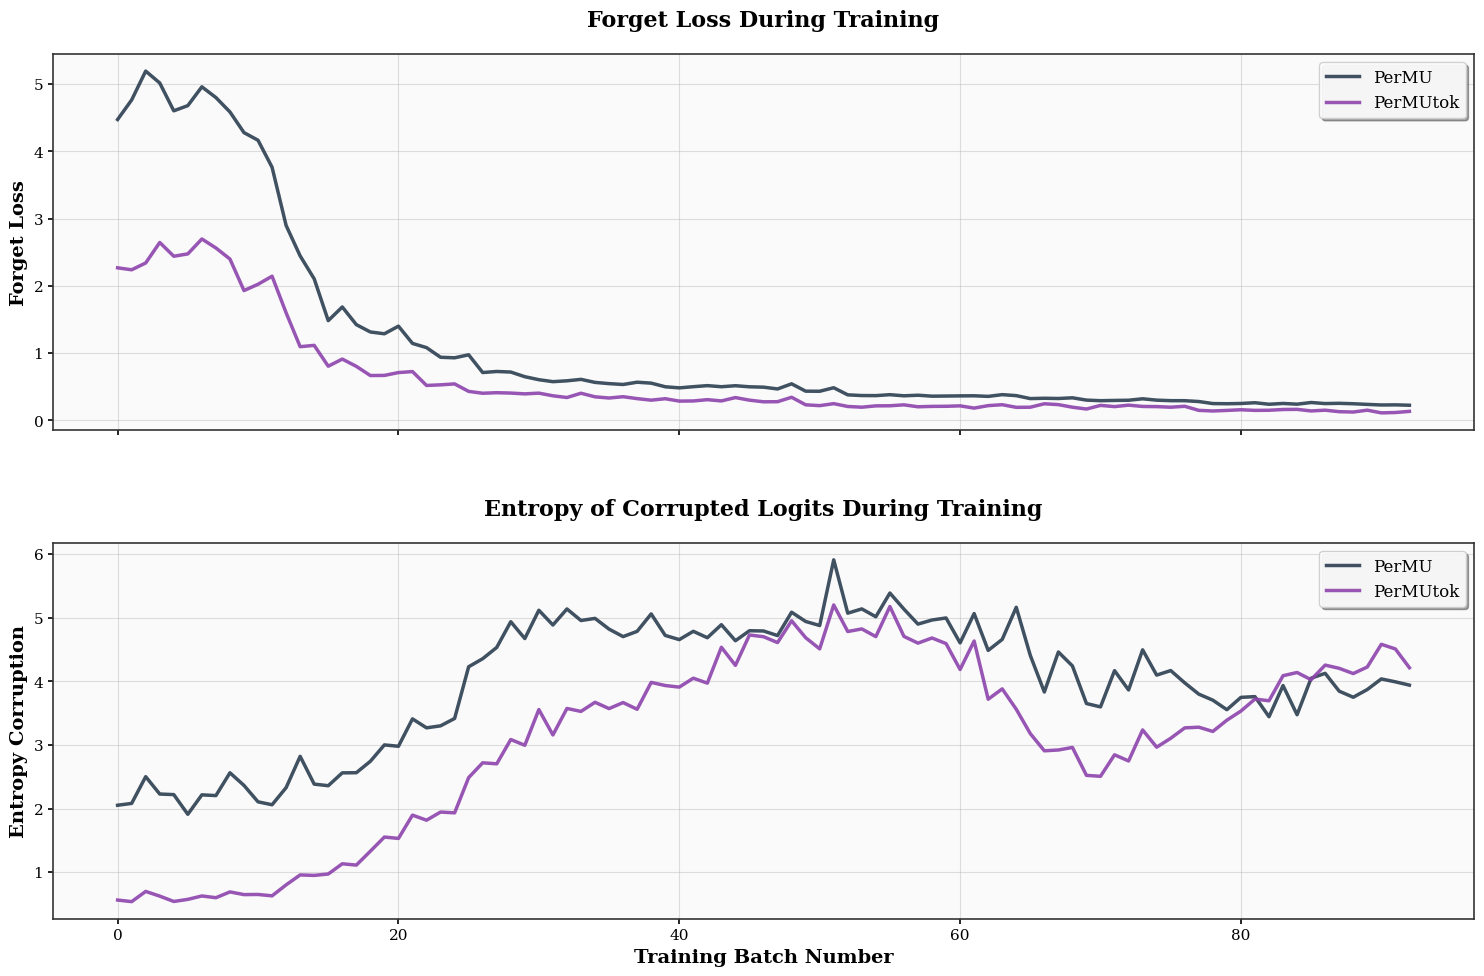

In [76]:
fig = plot_training_metrics_academic(df_aggregated, ['forget_loss_mean', 'entropy.corrupt_mean'])

In [32]:
raw_stats_df_final['config'] = raw_stats_df_final['config'].replace({
    'TLPerMU': 'PerMUtok',
    'subjectembedding': 'PerMU',
})

In [25]:
raw_stats_df_final.columns

Index(['forget_loss', 'experiment_info.experiment_name',
       'experiment_info.timestamp', 'experiment_info.total_batches',
       'entropy.clean', 'entropy.corrupt', 'entropy.difference',
       'entropy.contrasted', 'entropy.student', 'magnitude.clean',
       'magnitude.corrupt', 'magnitude.difference', 'magnitude.contrasted',
       'magnitude.student', 'kl_divergence.corrupt_vs_clean', 'config'],
      dtype='object')

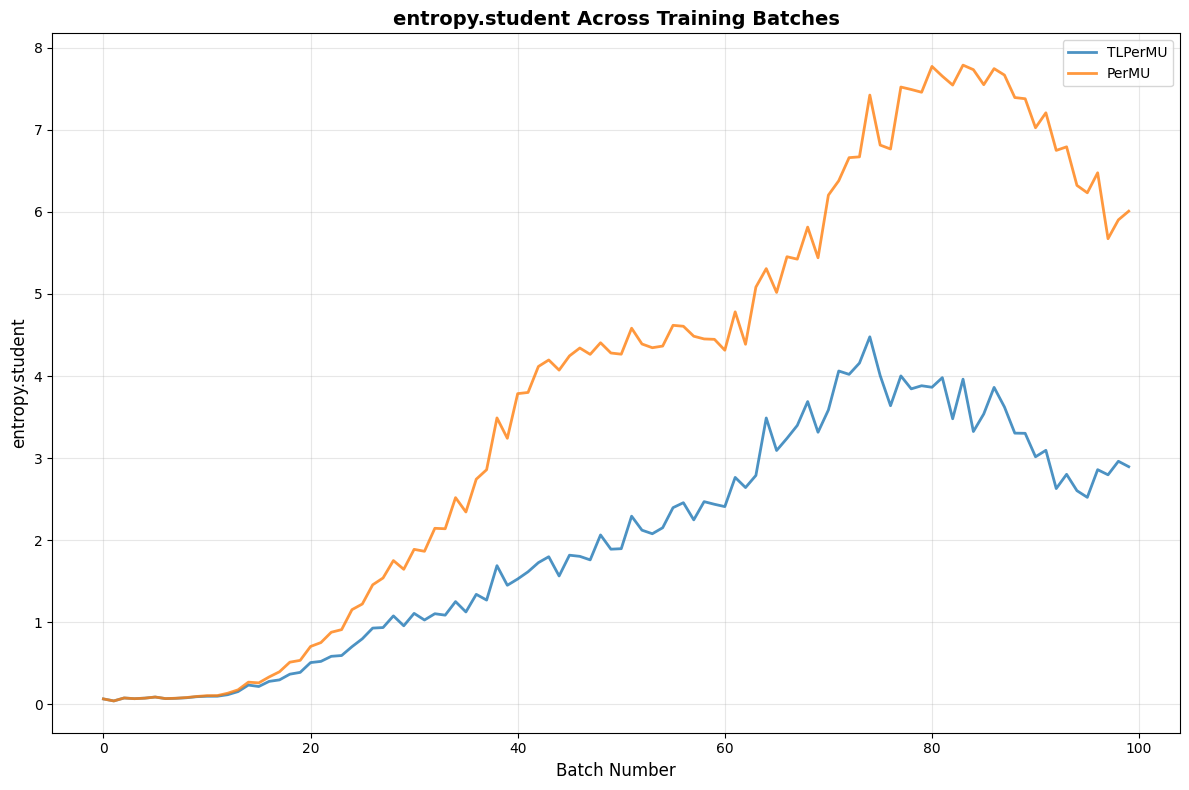

In [20]:
# Usage examples:
# Plot entropy.clean
plot_training_metrics(raw_stats_df_final, 'entropy.student')
plt.show()

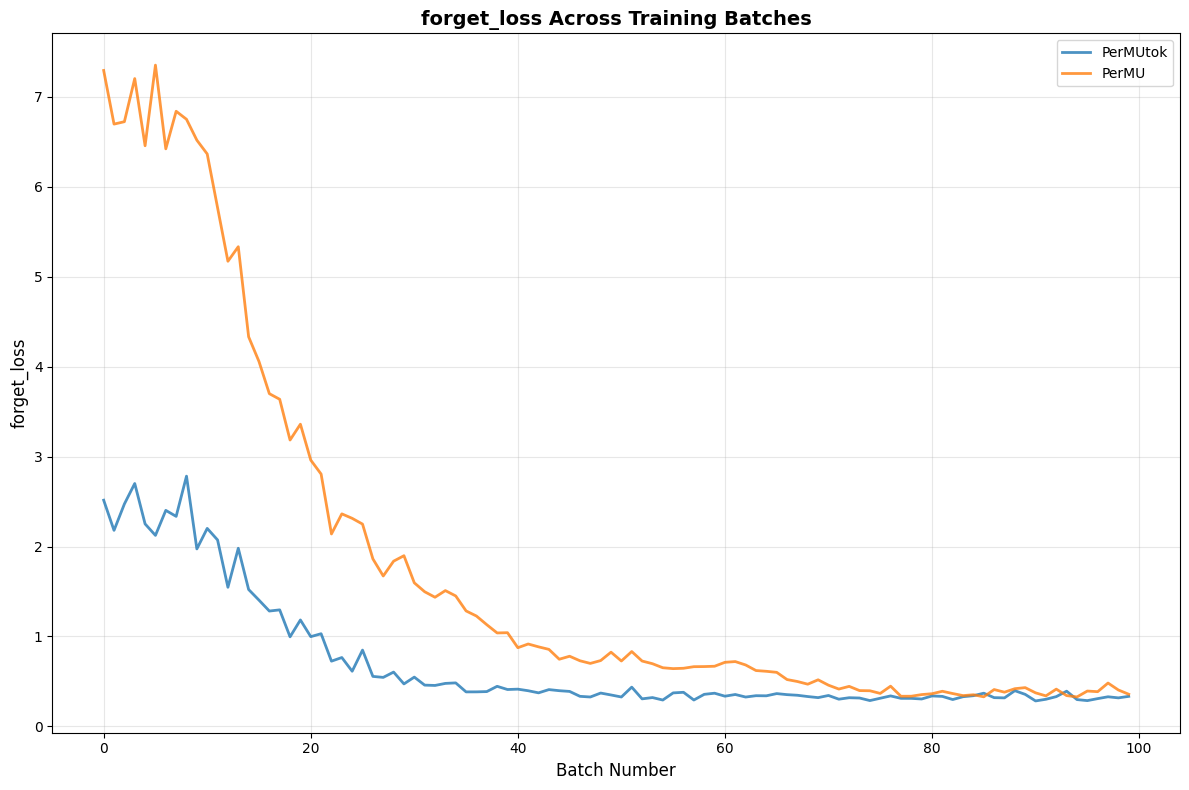

In [34]:

# Usage examples:
# Plot entropy.clean
plot_training_metrics(raw_stats_df_final, 'forget_loss')
plt.show()

In [15]:

# Usage examples:
plot_training_metrics(raw_stats_df_final, 'kl_divergence.corrupt_vs_clean')
plt.show()

NameError: name 'plot_training_metrics' is not defined

#### Replace Prob Explanation


PerMU is primarily based on the idea of subtrcating factually-unrealted probability (corrupt logits) from factually related prability distriubtion (clean logits), and thus further removing the factual influence. If we do not pertrub the corrupt logits enough, then they become way too similar to the clean logits, and then the unlearning signal is much weaker, thus having lower replace_prob means less unlearning. It also does not help that some subjects are made up of very few tokens so they might be very little perturbed.



#### K Distance Explanation


This one is not as easy or intuitive, especially because the results are quite similar. It was clearly visible though that the k1_first_char setting was better at unlearning more difficult examples. Our plots here don't seem to help us out with this, since the behaviour is not too different. We see slightly higher KLdivergence in the beginning which makes sense, then it equals out, also the student entropy is higher in the beginning, and then it also more or less equals out. Not sure, if this makes sense, but my initial idea is that adding too much noise to the subject would corrupt the sample in a way where the contrasted logits are not pointing in the direction of forgetting sugbject-related facts, but more so forgetting more sample specifc facts (better at forgetting the DirectQA), perhaps since the contrasted_logits are too big, so the trainign is steered in a more naive direction, rather than slowly removing the influence of the concept.